In [25]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
n_task_per_file = 10
n_files = 20
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [27]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [28]:
coverage_df

,0.5,1,2,4,Tree val,Naive
0,1.000000,1.000000,0.857143,1.000000,1.000000,0.200000
1,1.000000,1.000000,0.833333,1.000000,1.000000,0.250000
2,1.000000,1.000000,1.000000,0.857143,1.000000,0.400000
3,0.750000,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.000000,1.000000,1.000000,1.000000,0.666667,0.500000
...,...,...,...,...,...,...
5,1.000000,1.000000,1.000000,0.857143,1.000000,0.142857
6,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000
7,0.857143,0.714286,0.857143,0.833333,1.000000,0.200000
8,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000


In [29]:
length_df

,0.5,1,2,4,Tree val,Naive
0,55.899966,31.829445,27.612551,11.895152,71.069584,2.646198
1,65.973102,55.499334,19.965163,12.541696,9.891921,2.257610
2,99.939019,50.281379,29.208267,13.053312,40.701372,2.601393
3,40.389864,35.272142,22.495548,12.511033,14.815665,2.562771
4,34.114685,38.988063,29.304565,13.979549,66.897849,2.658202
...,...,...,...,...,...,...
5,57.438984,37.544731,20.116090,13.404129,61.921190,2.808434
6,47.831227,41.043964,25.031805,15.571245,23.384701,2.459044
7,20.878432,13.168554,14.841917,13.494383,31.163126,2.327440
8,39.661196,35.428318,25.945492,17.576557,12.109992,2.776805


In [30]:
MSE_df

,0.5,1,2,4,Tree val,Naive
0,22.074589,31.816679,25.809056,21.424045,21.281034,21.281034
1,35.575520,35.575520,35.413497,34.554546,30.866544,30.866544
2,37.468048,38.563702,40.242740,37.137157,36.951797,36.951797
3,45.935035,45.935035,47.062421,46.710129,45.935035,45.935035
4,37.856769,35.752962,36.176476,36.112550,37.931105,37.931105
...,...,...,...,...,...,...
5,21.948567,21.948567,22.348720,22.822360,19.470414,19.470414
6,30.247887,30.247887,28.719512,27.801140,31.856148,31.856148
7,29.359847,30.887222,30.887222,27.898667,31.423892,31.423892
8,36.569718,36.569718,36.867893,35.124988,31.815482,31.815482


In [31]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,200)
        elif metric == "MSE":
            axes[i].set_ylim(0,60)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.5         0.938952
1           0.936518
2           0.907690
4           0.873173
Tree val    0.880911
Naive       0.265804
dtype: float64
Length :
 0.5         59.303630
1           40.558994
2           24.897199
4           19.835943
Tree val          inf
Naive        2.603017
dtype: float64
MSE :
 0.5         32.061424
1           32.139078
2           32.029450
4           31.771220
Tree val    30.953930
Naive       30.953930
dtype: float64


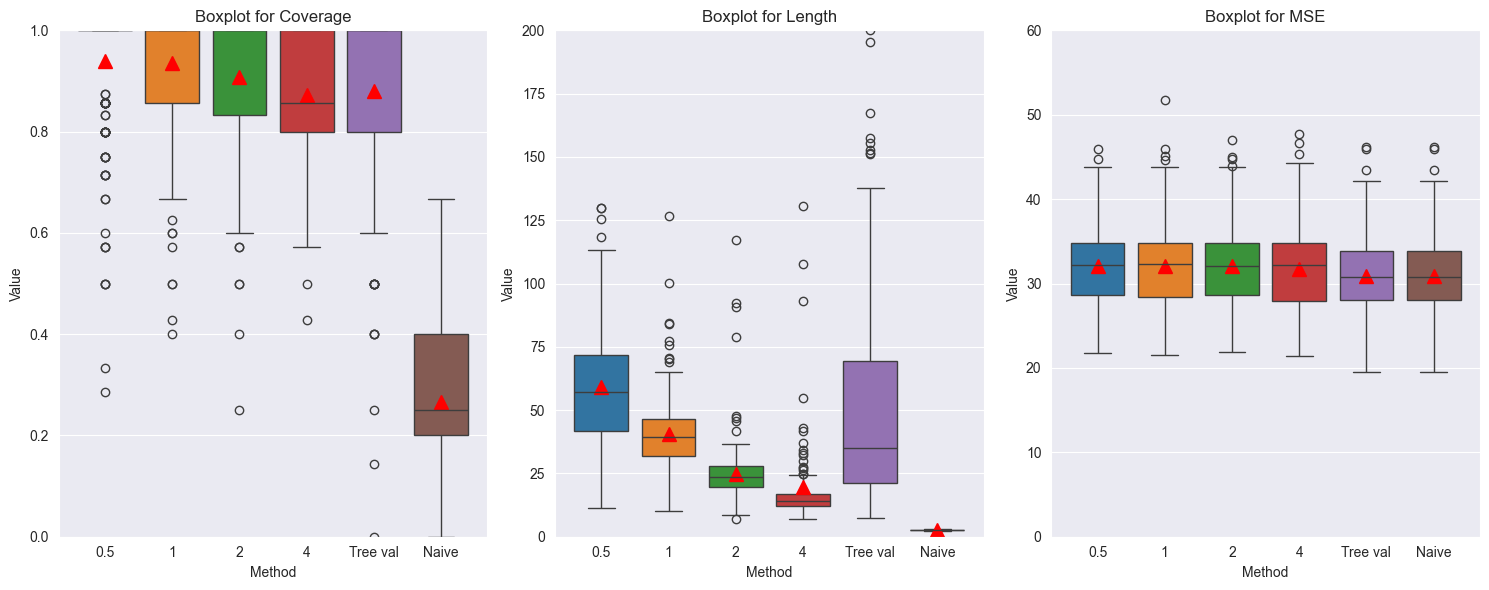

In [32]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])